### 0. 사용할 패키지 불러오기

In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Flatten

max_features = 20000
text_max_words = 200

Using TensorFlow backend.


### 1. 데이터셋 생성하기

In [2]:
# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

#훈렬셋과 검증셋 분리
x_val = x_train[20000:]
y_val = y_train[20000:]
x_train = x_train[:20000]
y_train = y_train[:20000]

# 데이터셋 전처리 : 문장 길이 맞추기
x_train = sequence.pad_sequences(x_train, maxlen = text_max_words)
x_val = sequence.pad_sequences(x_val, maxlen = text_max_words)
x_test = sequence.pad_sequences(x_test, maxlen=text_max_words)

17465344/17464789 [==============================] - 12s 1us/step


### 2. 모델 구성하기 

In [5]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=text_max_words))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6553856   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 9,114,113
Trainable params: 9,114,113
Non-trainable params: 0
_________________________________________________________________


### 3. 모델 학습과정 설정하기

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 4. 모델 학습시키기

In [8]:
hist = model.fit(x_train, y_train, epochs=2, batch_size=64, validation_data=(x_val, y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/2
20000/20000 [==============================] - 13s 644us/step - loss: 0.4144 - acc: 0.7930 - val_loss: 0.3045 - val_acc: 0.8706
Epoch 2/2
20000/20000 [==============================] - 5s 239us/step - loss: 0.0498 - acc: 0.9841 - val_loss: 0.4745 - val_acc: 0.8414


### 5. 학습과정 살펴보기

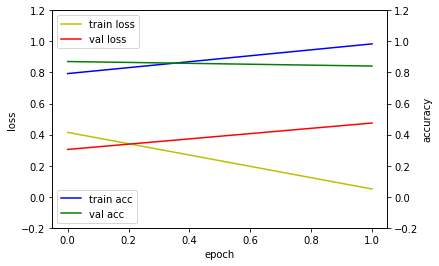

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 6. 모델 평가하기

In [11]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=64)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

25000/25000 [==============================] - 1s 36us/step
## evaluation loss and metrics ##
[0.47562034625053407, 0.8373599999809265]
